# Earthquake Analysis

This project analyzes earthquakes, using a public dataset provided by the USGS Nathional Earthquake Information Center (NEIC).

### Datasets

| Name | Source | Link |
| :-- | :-- | :-- |
| earthquakes.csv | USGS NEIC | [Kaggle](https://www.kaggle.com/usgs/earthquake-database)

In [35]:
import pandas as pd
import numpy as np
from datetime import datetime

In [98]:
df_quakes = pd.read_csv(r"..\Data\earthquakes.csv")

# Data Types and Casting

- [Review - Objects and Casting](https://github.com/bdjohnson529/Intro-To-Python/blob/master/Notes/Objects.md#types-and-casting)
- [strftime and strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

One part of data cleaning involves converting variables to the proper types. Recall that Python has several basic variable types, including strings and integers. In addition to the basic object types, Python also has built-in object types which are more complex such as [`datetime`](https://docs.python.org/3/library/datetime.html). These more complex data types are less efficient, but include built in functions which make them useful.

The first step of our data cleaning journey will be to cast the dates into the `datetime` object type. Dates can be formatted in a million different ways, and Pandas will usually default to reading in a date column as a string, leaving us the task of casting the string into a `datetime` column. 

In [18]:
# Simple example of casting
# Cast a string to an integer

mystr = '100'
print(type(mystr))

myint = int(mystr)
print(type(myint))

<class 'str'>
<class 'int'>


In [27]:
# Object types in the Pandas dataframe

df_quakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [30]:
# Examples of dates

df_quakes['Date']

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [55]:
# Write a function to convert the date string to a datetime object

def convertDateStr(inputStr):
    slashes = inputStr.find('/')
    
    if(slashes > -1):
        dateObj = datetime.strptime(inputStr, '%m/%d/%Y')
    else:
        dateStr = inputStr.split('T')[0]
        dateObj = datetime.strptime(dateStr, '%Y-%m-%d')
        
    return dateObj


print(convertDateStr('1985-04-28T02:53:41.000Z'))
print(convertDateStr('1985-04-28T02:53:41.530Z'))
print(convertDateStr('01/09/1965'))

1985-04-28 00:00:00
1985-04-28 00:00:00
1965-01-09 00:00:00


In [58]:
# Apply our function to the dataframe
df_quakes['Date_fmt'] = df_quakes['Date'].apply(convertDateStr)

# Create a year column
df_quakes['Year'] = df_quakes['Date_fmt'].apply(lambda x: x.strftime('%Y'))

In [64]:
# Using double braces we can select columns within a dataframe
df_quakes[['Date', 'Date_fmt', 'Year', 'Magnitude', 'Magnitude Type']]

,Date,Date_fmt,Year,Magnitude,Magnitude Type
0,01/02/1965,1965-01-02,1965,6.0,MW
1,01/04/1965,1965-01-04,1965,5.8,MW
2,01/05/1965,1965-01-05,1965,6.2,MW
3,01/08/1965,1965-01-08,1965,5.8,MW
4,01/09/1965,1965-01-09,1965,5.8,MW
...,...,...,...,...,...
23407,12/28/2016,2016-12-28,2016,5.6,ML
23408,12/28/2016,2016-12-28,2016,5.5,ML
23409,12/28/2016,2016-12-28,2016,5.9,MWW
23410,12/29/2016,2016-12-29,2016,6.3,MWW


In [95]:
# count earthquakes per year
df_peryear = df_quakes[['Year', 'Magnitude']].groupby(['Year']).count() \
                                            .rename(columns={'Magnitude': 'Count'})


# .head() function can be used to access top n elements of dataframe
df_peryear.head()

,Count
Year,
1965,339
1966,234
1967,255
1968,305
1969,323


[1965 1970 1975 1980 1985 1990 1995 2000 2005 2010 2015]


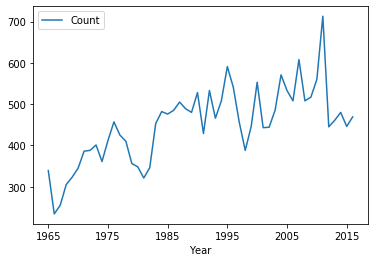

In [97]:
import matplotlib.pyplot as plt

x_ticks = np.arange(1965, 2016, 5)
print(x_ticks)

df_peryear.plot()